In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv("/content/drive/MyDrive/Crop123/crop_production_mod.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92772 entries, 0 to 92771
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          92772 non-null  int64  
 1   State_Name          92772 non-null  object 
 2   Crop_Type           92772 non-null  object 
 3   Crop                92772 non-null  object 
 4   N                   92772 non-null  int64  
 5   P                   92772 non-null  int64  
 6   K                   92772 non-null  int64  
 7   pH                  92772 non-null  float64
 8   rainfall            92772 non-null  float64
 9   temperature         92772 non-null  float64
 10  Area_in_hectares    92772 non-null  float64
 11  Production_in_tons  92772 non-null  float64
 12  Yield_ton_per_hec   92772 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 9.2+ MB


In [6]:
df.isnull().sum()

,0
Unnamed: 0,0
State_Name,0
Crop_Type,0
Crop,0
N,0
P,0
K,0
pH,0
rainfall,0
temperature,0


In [7]:
del df['Unnamed: 0']

In [8]:
df['Crop'].value_counts()

,count
Crop,
rice,9354
maize,8277
wheat,6020
sesamum,5956
moong,5551
rapeseed,5413
potato,5286
jowar,5189
onion,4722


In [9]:
for i,j in enumerate(df['State_Name']):
    df.at[i,'State_Name']=j.replace(' ','_')

In [10]:
df['State_Name'].value_counts()

,count
State_Name,
uttar_pradesh,10891
madhya_pradesh,9299
karnataka,7790
bihar,7420
tamil_nadu,6147
rajasthan,5600
assam,5181
odisha,5131
maharashtra,4008


<Axes: >

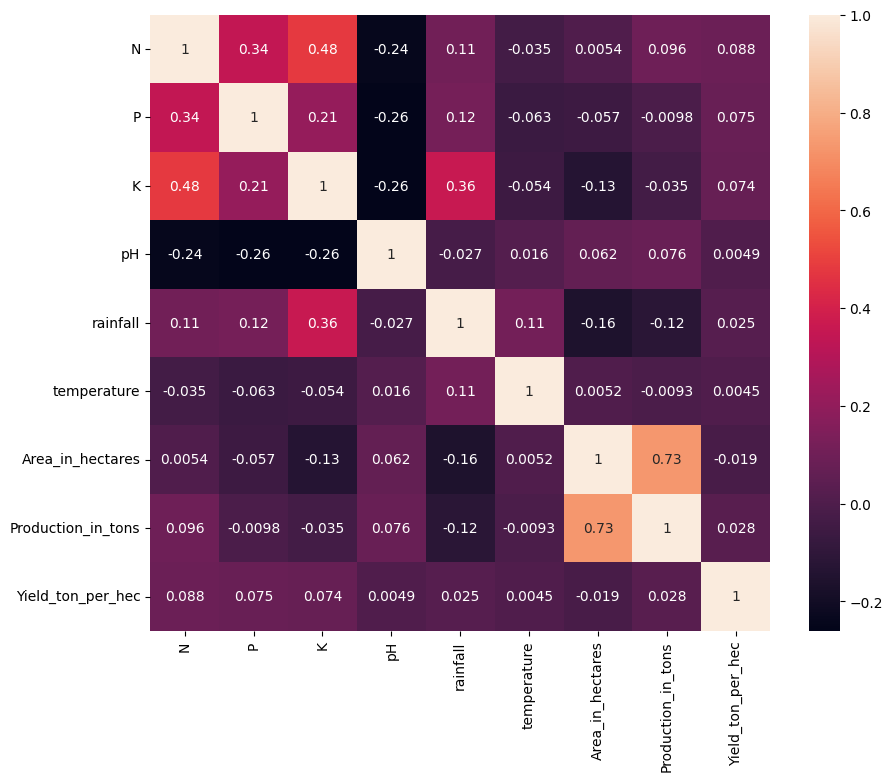

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [12]:
df_encoded=pd.get_dummies(df,columns=['State_Name','Crop','Crop_Type'])

In [13]:
df_encoded.head(20)

,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec,State_Name_andaman_and_nicobar_islands,...,Crop_sunflower,Crop_sweetpotato,Crop_tapioca,Crop_tomato,Crop_turmeric,Crop_watermelon,Crop_wheat,Crop_Type_kharif,Crop_Type_rabi,Crop_Type_whole year
0,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671,False,...,False,False,False,False,False,False,False,True,False,False
1,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030,False,...,False,False,False,False,False,False,False,True,False,False
2,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901,False,...,False,False,False,False,False,False,False,True,False,False
3,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000,False,...,False,False,False,False,False,False,False,True,False,False
4,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615,False,...,False,False,False,False,False,False,False,True,False,False
5,50,40,20,5.64,654.34,29.266667,6700.0,11800.0,1.761194,False,...,False,False,False,False,False,False,False,True,False,False
6,80,40,40,5.54,654.34,29.266667,35600.0,75400.0,2.117978,False,...,False,False,False,False,False,False,False,True,False,False
7,50,60,30,5.36,654.34,29.266667,35900.0,11100.0,0.309192,False,...,True,False,False,False,False,False,False,True,False,False
8,20,60,20,6.00,288.30,25.460000,600.0,200.0,0.333333,False,...,False,False,False,False,False,False,False,False,True,False
9,80,40,40,5.50,288.30,25.460000,18800.0,9400.0,0.500000,False,...,False,False,False,False,False,False,False,False,True,False


In [14]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92772 entries, 0 to 92771
Data columns (total 98 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   N                                       92772 non-null  int64  
 1   P                                       92772 non-null  int64  
 2   K                                       92772 non-null  int64  
 3   pH                                      92772 non-null  float64
 4   rainfall                                92772 non-null  float64
 5   temperature                             92772 non-null  float64
 6   Area_in_hectares                        92772 non-null  float64
 7   Production_in_tons                      92772 non-null  float64
 8   Yield_ton_per_hec                       92772 non-null  float64
 9   State_Name_andaman_and_nicobar_islands  92772 non-null  bool   
 10  State_Name_andhra_pradesh               92772 non-null  bo

In [15]:
df_encoded.to_csv("crop_final_India.csv",index=False)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
del df_encoded['Yield_ton_per_hec']

In [18]:
X=df_encoded.drop('Production_in_tons',axis=1)
y=df_encoded['Production_in_tons']

In [19]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [20]:
model.feature_importances_

array([1.63560327e-02, 1.84500041e-03, 2.98622051e-03, 1.94227915e-02,
       6.14668037e-03, 5.21253474e-03, 6.02465219e-01, 1.17736365e-06,
       9.76780423e-03, 8.82162514e-07, 2.29316366e-04, 8.00125636e-04,
       4.15505127e-08, 3.33630454e-04, 2.61497238e-07, 6.39873893e-06,
       9.71806439e-03, 1.08898960e-02, 4.49478604e-05, 3.65768430e-05,
       1.56812745e-04, 4.01242709e-03, 9.24435661e-04, 5.44981939e-03,
       1.73910837e-03, 1.89930305e-05, 8.91316963e-05, 1.18456109e-06,
       1.23512284e-05, 8.21811181e-04, 1.95756493e-06, 6.88784883e-02,
       1.28936352e-03, 3.17576616e-06, 4.05861246e-03, 2.21868474e-03,
       8.11008906e-05, 9.30708121e-03, 1.76276180e-04, 1.70484414e-02,
       1.70748533e-13, 2.32680268e-04, 4.83647111e-10, 8.47670723e-03,
       9.29624816e-05, 4.52846116e-09, 2.79665780e-10, 3.36030535e-08,
       7.69833511e-06, 1.94692814e-10, 4.12489971e-06, 4.70886903e-06,
       3.60125721e-06, 7.08563010e-09, 4.64693637e-05, 4.22076583e-09,
      

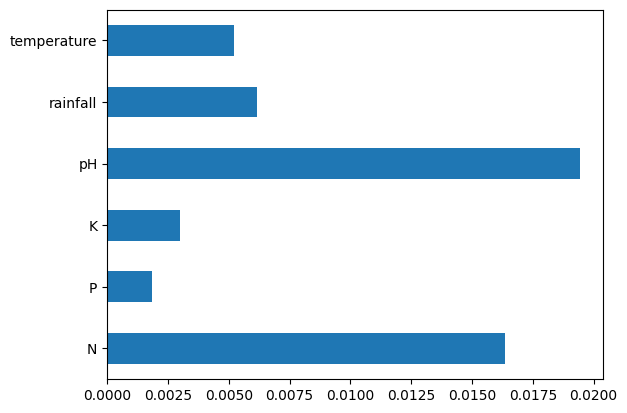

In [21]:
feat_imps=pd.Series(model.feature_importances_,index=X.columns)
feat_imps[:6].plot(kind="barh")
plt.show()

In [22]:
import pickle
with open("ExtraTreesRegressor.pkl",'wb') as extra_file:
    pickle.dump(model,extra_file)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
X_train.to_csv("X_train.csv",index=False)
X_test.to_csv("X_test.csv",index=False)
y_train.to_csv("y_train.csv",index=False)
y_test.to_csv("y_test.csv",index=False)

In [25]:
from sklearn.metrics import *

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
rf = RandomForestRegressor()

In [28]:
from sklearn.model_selection import RandomizedSearchCV

In [29]:
### HyperParameter Tuning ###
n_estimators=[int(i) for i in np.linspace(start=40,stop=110,num=8)]

max_features=['auto','sqrt']

max_depth=[int(i) for i in np.linspace(5,30,num=6)]

min_samples_split = [2,5,10,15,100]

min_samples_leaf = [1,2,5,10]

In [30]:
n_estimators

[40, 50, 60, 70, 80, 90, 100, 110]

In [31]:
random_grid={'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}

In [68]:
rf_cv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring="neg_mean_squared_error",n_iter=100,cv=10,verbose=2,random_state=42,n_jobs=1)

In [69]:
rf_cv.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=1

KeyboardInterrupt: 

In [59]:
rf_best=rf_cv.best_estimator_

In [60]:
rf_best

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=60)

In [61]:
rf_pred=rf_cv.predict(X_test)

In [62]:
rf_cv_r2=r2_score(y_test,rf_pred)

In [63]:
rf_cv_mae=mean_absolute_error(y_test,rf_pred)

In [64]:
rf_cv_mse=mean_squared_error(y_test,rf_pred)

In [65]:
rf_cv_rmse=np.sqrt(rf_cv_mse)

In [66]:
rf_cv_score=rf_best.score(X_test,y_test)

In [55]:
print(f'R2_score is : {rf_cv_r2}')
print(f'MSE is : {rf_cv_mse}')
print(f'RMSE is : {rf_cv_rmse}')
print(f'MAE is : {rf_cv_mae}')
print(f'Model Score is : {rf_cv_score}')


R2_score is : 0.9257806350273068
MSE is : 1093367727.3346517
RMSE is : 33066.11146377287
MAE is : 9214.082554396575
Model Score is : 0.9257806350273068


In [67]:
print(f'R2_score is : {rf_cv_r2}')
print(f'MSE is : {rf_cv_mse}')
print(f'RMSE is : {rf_cv_rmse}')
print(f'MAE is : {rf_cv_mae}')
print(f'Model Score is : {rf_cv_score}')

R2_score is : 0.923951049532581
MSE is : 1120320393.0583313
RMSE is : 33471.18750594802
MAE is : 9340.979780820766
Model Score is : 0.923951049532581


In [56]:
# Save the RandomForest Model
with open('random_forest_model_12345.pkl', 'wb') as f:
    pickle.dump(rf, f)

print("Improved model saved as 'random_forest_model_12345.pkl'")


Improved model saved as 'random_forest_model_12345.pkl'


In [70]:
import pickle

# Load the Random Forest model
with open('/content/random_forest_model_improved.pkl', 'rb') as f:
    rf_loaded = pickle.load(f)

# Now you can use rf_loaded to make predictions
# For example, if you have new data to predict:
# new_data = ...  # Your new input data as a 2D array or DataFrame
# predictions = rf_loaded.predict(new_data)

print("Model loaded successfully.")


Model loaded successfully.


In [71]:
import pandas as pd

# Data preparation
data = {
    'N': [120, 20, 80, 80, 20, 50, 80, 50, 20, 80],
    'P': [40, 60, 40, 40, 40, 40, 40, 60, 60, 40],
    'K': [20, 20, 40, 20, 20, 20, 40, 30, 20, 40],
    'pH': [5.46, 6.18, 5.42, 5.62, 5.68, 5.64, 5.54, 5.36, 6, 5.5],
    'rainfall': [654.34, 654.34, 654.34, 654.34, 654.34, 654.34, 654.34, 654.34, 288.3, 288.3],
    'temperature': [29.26666667, 29.26666667, 29.26666667, 29.26666667, 29.26666667, 29.26666667, 29.26666667, 29.26666667, 25.46, 25.46],
    'Area_in_hectares': [7300, 3300, 10100, 2800, 1300, 6700, 35600, 35900, 600, 18800]
}

# Create a DataFrame
input_data = pd.DataFrame(data)


In [80]:
import pickle
import numpy as np
import pandas as pd

# Load the model
with open('/content/random_forest_model_improved.pkl', 'rb') as f:
    rf_loaded = pickle.load(f)

# Prepare the input data as a DataFrame
data = [[30, 60, 40, 5.62, 656.14, 29, 3500]]  # Note the double brackets to create a 2D array
columns = ['N', 'P', 'K', 'pH', 'rainfall', 'temperature', 'Area_in_hectares']
input_data = pd.DataFrame(data, columns=columns)

# Make predictions
predictions = rf_loaded.predict(input_data)

# Print the predictions
print("Predicted crop yields:", predictions)


NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [73]:
# Load the model
import pickle

with open('/content/random_forest_model_improved.pkl', 'rb') as f:
    rf_loaded = pickle.load(f)

# Assuming you have training data X_train and y_train:
# rf_loaded.fit(X_train, y_train)  # Fit the loaded model with your training data

# Assuming input_data is your new data for prediction
# Make predictions
predictions = rf_loaded.predict(input_data)

# Print the predictions
print("Predicted crop yields:", predictions)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [81]:
import pandas as pd
import pickle

# Load the trained Random Forest model
with open('/content/random_forest_model_12345.pkl', 'rb') as rf_file:
    rf_model = pickle.load(rf_file)

# Create a DataFrame for dummy input values
# Replace these values with appropriate dummy data according to your model's features
dummy_input = {
    'N': [100],        # Dummy nitrogen value
    'P': [50],         # Dummy phosphorus value
    'K': [25],         # Dummy potassium value
    'pH': [6.5],       # Dummy pH value
    'rainfall': [200], # Dummy rainfall value
    'temperature': [30],  # Dummy temperature value
    'Area_in_hectares': [5]  # Dummy area in hectares
}

# Convert the dictionary to a DataFrame
dummy_df = pd.DataFrame(dummy_input)

# Make prediction using the loaded Random Forest model
predicted_production = rf_model.predict(dummy_df)

# Display the prediction
print(f"Predicted Crop Production: {predicted_production[0]}")


NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import pickle

# Load your dataset
data = pd.read_csv('/content/crop_final_India (1).csv')

# Define features and target variable
X = data[['N', 'P', 'K', 'pH', 'rainfall', 'temperature', 'Area_in_hectares']]
y = data['Production_in_tons']  # or whichever column you're predicting

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Save the trained model to a file
with open('RandomForest_model_1.pkl', 'wb') as rf_file:
    pickle.dump(rf_model, rf_file)


In [5]:
import pandas as pd
import pickle

# Load the trained Random Forest model
with open('/content/RandomForest_model_1.pkl', 'rb') as rf_file:
    rf_model = pickle.load(rf_file)

# Check if the model is fitted
if hasattr(rf_model, 'estimators_'):
    print("Model is fitted.")
else:
    print("Model is not fitted.")


Model is fitted.


In [8]:
# Create a DataFrame for dummy input values
dummy_input = {
    'N': [100],        # Dummy nitrogen value
    'P': [80],         # Dummy phosphorus value
    'K': [75],         # Dummy potassium value
    'pH': [5.5],       # Dummy pH value
    'rainfall': [200], # Dummy rainfall value
    'temperature': [30],  # Dummy temperature value
    'Area_in_hectares': [60]  # Dummy area in hectares
}

# Convert the dictionary to a DataFrame
dummy_df = pd.DataFrame(dummy_input)

# Make prediction using the loaded Random Forest model
predicted_production = rf_model.predict(dummy_df)

# Display the prediction
print(f"Predicted Crop Production: {predicted_production[0]}")


Predicted Crop Production: 1687.11


In [9]:
print(f"Predicted Crop Production: {predicted_production}")


Predicted Crop Production: [1687.11]
